# Paralelni algoritmi - drugi projekat

- Projekat se radi individualno ili u paru

- Rok za predaju projekata je ponedeljak 14.12.2020. Biće potrebno da se studenti koji planiraju da urade i odbrane projekat prijave, do datuma i procedurom koji će naknadno biti objavljeni.

- Predaja projekata je putem emaila, programski kod bi trebalo da
bude prikacen uz sam email. Link ka Collab-u je opcion. Ukoliko dva
studenta rade u paru, dovoljno je da jedan od njih preda, pri cemu
drugog stavi u cc. E-mail treba da sadrzi sve podatke (ime, prezime,
broj indeksa) za oba studenta.


1. **Pristup tekstu sa Wikipedije putem MapReduce programa (6 bodova)**  
Napisati program koji kroz map-reduce paradigmu (upotrebom funkcije *map* iz Python standardne biblioteke i funkcije *reduce* iz paketa *functools*):
  - Za zadatu listu ključnih reči vrši pretragu Wiki stranica i dohvata zadati broj rezultata (naslova stranica)
    Za pristup wiki stranicama se može koristiti python biblioteku [*wikipedia*](https://pypi.org/project/wikipedia/):
```python
import wikipedia
wikipedia.set_lang("sr")
```
```python
def get_pages(query, results=50):
  '''Dohvata naslove zahtevanog broja stranica koje se pojavaljuju kao 
      rezultati pretrage za zadatu kljucnu rec'''
      pages = wikipedia.search(query, results=results)
      return pages
```
  - Paralelizovati rešenje iz prethodne tačke upotrebom funkcija `Pool.map` iz paketa `multiprocessing`
  - Wikipedia API ponekad vrati nevalidne naslove stranica, pa je rezultate neophodno sanitizovati. Napisati map/reduce rešenje koje sanitizuje rezultate iz prethodne tačke. Sanitizacija se može izvesti pokušajem da dohvatanja stranice na osnovu nasova (`wikipedia.page(title)`) i hvatanjem izuzetaka.
  - Napisati map/reduce rešenje koje dohvata sažetke stranica (`page.summary`) iz sanitizovane liste formirane u prethodnoj tački.
  - Wikipedia API ponekad meša stranice na ćiriličnom i latiničnom pismu. Unifikovati tekstive dobijene u prethodnoj tački prevođenjem reči na isto pismo (ćirilično ili latinično)
  ```python
import transliterate
transliterate.translit(word, 'sr')
```
 - Odabrati nekoliko ključnih reči po slobodnom izboru i pokazati da program radi dohvatanjem po dva rezultata za svaku kljunu reč.

2. **Brojanje reci u tesktu i bag-of-words reprezentacija putem MapReduce programa (8 bodova)**  
U ovom zadatku ćemo stranice predstaviti kao *bag-of-words* vektore. *Bag-of-words* reprezentacija se dobija tako što za *sve** reči koje se pojavljuju u svim tekstovima izbrojimo koliko puta se pojavljuju u svakom tekstu. Tekst potom predstvaljamo kao vektor ovih brojeva.   
Na primer, posmatrajmo dva teksta:
``` 
Pera voli da gleda filmove. Mika takođe voli filmove.
``` 
```
Mika voli da gleda i fudbalske utakmice.
```
Reči koje se pojavljuju su:
```
Pera, voli, da, gleda, filmove, Mika, takođe, i, fudbalske, utakmice
``` 
  *Bag-of-words* reprezentacija tekstova je:
```
1, 2, 1, 1, 2, 1, 1, 0, 0, 0
```
odnosno:
```
0, 1, 1, 1, 0, 1, 0, 1, 1, 1
```
U praksi se reči koje se previše često ili previše retko pojavljuju uglavnom odbacuju. 
  - Napisati map/reduce program koji datu listu tesktiva pretvara u *Bag-of-words* reprezentaciju. Pre brojanja reči potrebno je sve reči prevesti u mala ili velika slova (po vašem izboru), te izbaciti interpunkcijske znake i specijalne karaktere (u najmanju ruku sledeći skup `\n, \t, =, -, (, ), _`). Odbaciti reči koje se pojavljuju veoma često u većini tekstovima (nalaze se u 90% najčešćih reči u bar 90% tekstova), ili se pojavljuju u manje od 1% tekstova. Ovu obradu izvesti kroz posebne map/reduce korake.
  - Ručno uneti nekoliko tekstova po slobodnom izboru i pokazati da program radi.

3. **K-means klastersanje putem MapReduce programa (5 bodova)**   
Napisati map/reduce program koji vrši k-means klasterisanje liste vektora.
Nasumično generisati podatke iz nekoliko normalnih raspodela u dve dimenzije i pokazati da algoritam radi (videti vežbe za primer). 

4. **Primena rešenja  (6 bodova)**  
Povezati kod iz zadataka 1-3 kojim se Wiki na srpskom jeziku pretražuje za sledeći skup ključnih reči `['Beograd', 'Prvi svetski rat', 'Protein', 'Mikroprocesor', 'Stefan Nemanja', 'Košarka']`, za svaku dohvata po 50 rezultata, stranice prevode u *bag-of-words* reprezentaciju, i vrši njihovo klasterisanje. 
U kojom meri klasteri odgovaraju temama prema kojima su stranice dohvatane?

In [ ]:
!pip install wikipedia
!pip install transliterate

# **GET_PAGES + SUMMARY**

In [ ]:
from multiprocessing import Pool, cpu_count
from functools import reduce
from itertools import starmap
import wikipedia
import transliterate as trans



wikipedia.set_lang("sr")
pool = Pool(cpu_count())



def get_pages(query, results=50):
    return query, wikipedia.search(query, results=results)

def sanitize_tuple(key, value):
    return key, reduce(izbaci_None, pool.map(sanitize, value), [])

def sanitize_list(value):
    #pool.map ili pool.map_async
    return reduce(izbaci_None, pool.map(sanitize, value), [])

def sanitize(value):
    try:
        return wikipedia.page(value)
    except:
        print("EXCEPT: " + str(value))
        return None

def izbaci_None(ulaz, izlaz):
    if izlaz is not None:
        return ulaz + [izlaz]
    else:
        return ulaz

def summary(vrednost):
    return wikipedia.summary(vrednost.title)

def merge_search(izlaz, ulaz):
    return izlaz + ulaz

def get_page_summary(key, value):
    return pool.map(summary, value)

def translit(vrednost):
    return str(trans.translit(vrednost, 'sr'))

In [ ]:


keywords = ['Beograd', 'Prvi svetski rat', 'Protein', 'Mikroprocesor', 'Stefan Nemanja', 'Košarka']


all_pages_list = pool.map(get_pages, keywords)
sanitizovana_lista = list(starmap(sanitize_tuple, all_pages_list))

print(sanitizovana_lista)


#sanitizovana_lista u sebi sadrzi listu tuplova (Keyword, lista sanitizovanih stranica) 



EXCEPT: Protein-glutamat O-metiltransferaza


/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


EXCEPT: IP


/usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py:389: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file /usr/local/lib/python3.6/dist-packages/wikipedia/wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


EXCEPT: Стефан I
[('Beograd', [<WikipediaPage 'Beograd 2020'>, <WikipediaPage 'Градска општина Нови Београд'>, <WikipediaPage 'ГСП Београд'>, <WikipediaPage 'Blu dragonsi Beograd'>, <WikipediaPage 'ОФК Београд'>, <WikipediaPage 'Библиотека града Београда'>, <WikipediaPage 'Трг републике (Београд)'>, <WikipediaPage 'Грб Београда'>, <WikipediaPage 'Београд у Народноослободилачкој борби'>, <WikipediaPage 'Народно позориште у Београду'>, <WikipediaPage 'Историја Београда'>, <WikipediaPage 'Бомбардовање Београда (1941)'>, <WikipediaPage 'Аеродром Никола Тесла Београд'>, <WikipediaPage 'Кнез Михаилова (Београд)'>, <WikipediaPage 'ОШ „Милан Ракић” Нови Београд'>, <WikipediaPage 'Филозофски факултет Универзитета у Београду'>, <WikipediaPage 'ФК Раднички Београд'>, <WikipediaPage 'Филолошки факултет Универзитета у Београду'>, <WikipediaPage 'ОШ „Јован Дучић” Нови Београд'>, <WikipediaPage 'Гробље ослободилаца Београда 1944.'>, <WikipediaPage 'Студентски културни центар Београд'>, <WikipediaPage

In [ ]:
#all summary list ne cuva kljucne reci pretrage , kao sto su 'beograd', 'prvi svetski rat' ...
#all summary list cuva summary svih pretraga u jednu listu koja ce kasnije biti korisna za
#bag-of-words zadatak

all_summary_list = list(map(translit, reduce(merge_search, starmap(get_page_summary, sanitizovana_lista), [])))
print(len(all_summary_list))
print(all_summary_list)

In [ ]:
#
#   PRVA STAVKA PRIMER
#

def get_pages_dva(query, results=2):
    return query, wikipedia.search(query, results=results)


kljucne_reci_za_prezentaciju = ['Cyberpunk', 'Algoritmi', 'Tastatura']
prva_stavka_resenje = list(map(translit, reduce(merge_search, starmap(get_page_summary, list(starmap(sanitize_tuple, pool.map(get_pages_dva, kljucne_reci_za_prezentaciju)))), [])))

print(prva_stavka_resenje)

['Сајберпанк (енгл. Цyберпунк) је поџанр научне фантастике-а са радњом смештеном у будућност и са фокусом на „високој технологији и лошем животу“ (енгл. хигх тецх анд лоw лифе). Израз сајберпанк вуче порекло из маркетинга, а у научној фантастици га је први пут употребио Брус Бетки 1980. у краћој причи „Сајберпанк“.', "ЦД Пројект је пољска компанија која програмира, издаје и дистрибуира видео игре, са седиштем у Варшави, која је основана 1994. Марцин Иwиńски и Мицхаł Кициńски. Ивински и Кичински су били продавци видео игара пре него што су основали компанију. ЦД Пројект је најпознатији по својој серији видео игара Вештац и њиховог дигиталног дистрибутера, ГОГ.цом.\nКомпанија је почела тако што су преводили главна издања видео игра са запада на пољски, сарађујући са Интерплаy Ентертаинмент на две Балдур'с Гате игре. ЦД Пројект је радио на ПР верзији Балдур'с Гате: Дарк Аллианце када је Интерплаy искусила финансијске потешкоће. Игра је отказана, а компанија је одлучила да поново користи к

# **BROJANJE RECI -> BAG-OF-WORDS**

In [ ]:
def key_reduce(key_value, izlaz):
    key1, value1 = izlaz
    if len(key_value) is not 0:
        key2, value2 = key_value[-1]
        if key1 is not key2:
          return key_value + [(key1, value1)]
        else:
            return key_value + [(key1, value1 + 1)]
    else:
        return key_value + [(key1, value1)]
    
def uredi_parove(rec):
    return rec, 1

def test_reduce(izlaz, ulaz):
    brojac = 0
    for x,y in izlaz:
        if x == ulaz[0]:
            izlaz[brojac] = x, y+1
            return izlaz
        brojac += 1
    return izlaz + [ulaz]

def izbaci_procent(izlaz, ulaz):
    if ulaz[1] >= 0.1 * izlaz[0] or ulaz[1] <= 0.01 * izlaz[0]:
        return izlaz
    else:
        return izlaz + [ulaz]
    
def izbaci_prazan_string(izlaz, ulaz):
    if ulaz[0] == '':
        return izlaz
    else:
        return izlaz + [ulaz]

import re

def obradi_tekst(tekst):
    tekst = tekst.lower()
    for n in ['\n', '\t', '=', '-', ',', '_', '.', ':', '„', '”', '\'', '(', ')', '\"', '\'', '+', '/', '—']:
        tekst = tekst.replace(n, ' ')    
    return re.split(' ', tekst)

def all_words(page_summary):
    return reduce(test_reduce, map(uredi_parove, obradi_tekst(page_summary)),[])

def saberi_po_kljucu(izlaz, ulaz):
    #print("IZLAZ : {}".format(izlaz))
    #print("ULAZ : {}".format(ulaz))
    if izlaz[-1] == None:
        return [ulaz]
    if ulaz[0] == izlaz[-1][0]:
        return izlaz[:-1] + [(izlaz[-1][0] , izlaz[-1][1] + ulaz[1])]
    else:
        return izlaz + [ulaz]


In [ ]:
resenje = reduce(merge_search, map(all_words, all_summary_list), [])
resenje = reduce(saberi_po_kljucu, sorted(reduce(izbaci_prazan_string, resenje,[]), key = lambda x: x[0]), [None])

print(resenje)

NameError: ignored

In [ ]:
sto_posto = 0

for x,y in resenje:
    sto_posto += y


print("broj tuplova : {}".format(len(resenje)))
print("100% : {} | 10% : {} | 1% : {}".format(sto_posto, 0.1*sto_posto, 0.01*sto_posto))
beograd_bag_of_words_model = reduce(izbaci_procent, resenje, [sto_posto])
beograd_bag_of_words_model = beograd_bag_of_words_model[1:]
print("broj tuplova : {}".format(len(beograd_bag_of_words_model)))
print(beograd_bag_of_words_model)

broj tuplova : 9854
100% : 37977 | 10% : 3797.7000000000003 | 1% : 379.77
broj tuplova : 6
[('и', 1470), ('на', 537), ('се', 520), ('су', 584), ('у', 1060), ('је', 1513)]


In [ ]:
print(beograd_bag_of_words_model)
lista_kljucnih_reci = list()
for x, y in beograd_bag_of_words_model:
    lista_kljucnih_reci.append(x)
print(lista_kljucnih_reci)

[('и', 1470), ('на', 537), ('се', 520), ('су', 584), ('у', 1060), ('је', 1513)]
['и', 'на', 'се', 'су', 'у', 'је']


In [ ]:
summary_list_final = map(obradi_tekst, all_summary_list)

def funkcija(test):

    def add_one(word):
        return word, 1
    text = map(add_one, test)
    text = sorted(text, key = lambda x: x[0])
    resenje = reduce(saberi_po_kljucu, text, [None])

    def main_fun(izlaz, ulaz):
        try:
            if izlaz == ulaz[0]:
                return ulaz[1]
            else:
                return izlaz
        except:
            pass

    def reduce_final(kljucna_rec):
        return reduce(main_fun, resenje, kljucna_rec) if isinstance(reduce(main_fun, resenje, kljucna_rec), int) else 0
            
    return list(map(reduce_final, lista_kljucnih_reci))

all_vectors = list(map(funkcija, list(summary_list_final)))

all_vectors = list(map(tuple, all_vectors))
beograd = list((tuple(lista_kljucnih_reci), all_vectors))
print('Kalup({}) = {}\nVectors = {}\nVectors count = {}\n'.format(len(beograd[0]), beograd[0],beograd[1],len(beograd[1])))



Kalup(6) = ('и', 'на', 'се', 'су', 'у', 'је')
Vectors = [(7, 1, 1, 2, 3, 5), (3, 1, 2, 0, 1, 5), (4, 0, 0, 0, 2, 4), (1, 0, 0, 1, 1, 0), (6, 0, 2, 0, 7, 2), (1, 0, 1, 0, 1, 2), (4, 4, 3, 0, 5, 2), (2, 0, 1, 0, 2, 2), (9, 1, 0, 7, 8, 15), (12, 1, 3, 0, 9, 15), (6, 1, 1, 4, 7, 9), (2, 1, 1, 1, 2, 0), (3, 1, 1, 0, 4, 5), (5, 2, 2, 0, 3, 4), (2, 3, 1, 0, 2, 2), (10, 1, 2, 1, 4, 6), (1, 1, 1, 0, 2, 0), (0, 0, 1, 0, 1, 2), (7, 5, 4, 1, 7, 7), (1, 1, 0, 0, 0, 1), (15, 2, 9, 6, 13, 12), (2, 0, 1, 1, 4, 1), (3, 3, 3, 1, 3, 4), (5, 1, 0, 0, 2, 2), (13, 7, 7, 11, 13, 17), (6, 4, 2, 2, 6, 11), (1, 1, 1, 0, 0, 0), (6, 2, 1, 0, 2, 3), (5, 1, 1, 3, 10, 11), (7, 1, 1, 0, 3, 6), (0, 1, 2, 0, 3, 2), (0, 1, 0, 0, 0, 4), (3, 1, 0, 0, 0, 1), (0, 0, 0, 0, 0, 2), (3, 1, 3, 0, 1, 4), (0, 0, 1, 0, 2, 2), (0, 0, 0, 0, 2, 1), (0, 0, 0, 0, 2, 1), (0, 1, 1, 0, 2, 1), (10, 5, 4, 4, 15, 26), (1, 1, 0, 0, 2, 5), (1, 0, 0, 0, 0, 2), (3, 1, 0, 0, 3, 4), (8, 3, 1, 1, 7, 11), (0, 0, 1, 0, 1, 1), (4, 5, 3, 4, 1, 9), (1, 0

In [ ]:
#
#   PRIMER BAG-OF-WORDS
#

def funkcija(test):

    def add_one(word):
        return word, 1
    text = map(add_one, test)
    text = sorted(text, key = lambda x: x[0])
    resenje = reduce(saberi_po_kljucu, text, [None])

    def main_fun(izlaz, ulaz):
        try:
            if izlaz == ulaz[0]:
                return ulaz[1]
            else:
                return izlaz
        except:
            pass

    def reduce_final(kljucna_rec):
        return reduce(main_fun, resenje, kljucna_rec) if isinstance(reduce(main_fun, resenje, kljucna_rec), int) else 0
            
    return list(map(reduce_final, bag_of_words_kalup))


test_primer = ["Mara mnogo voli Milovana, a Milovan mnogo voli Anu", 
               "Ana ne zna Milovana.", "Milovan je kriper.", 
               "Milovan mnogo voli Anu, Mara za to ne zna.", 
               "Da Mara sazna, bila bi ljubomorna."]

lista = reduce(saberi_po_kljucu, sorted(reduce(izbaci_prazan_string, reduce(merge_search, map(all_words, test_primer), []),[]), key = lambda x: x[0]), [None])


bag_of_words_kalup = list()
for x, y in lista:
    bag_of_words_kalup.append(x)


test_lista = list(map(obradi_tekst, test_primer))



all_vectors = list(map(funkcija, test_lista))
all_vectors = list(map(tuple, all_vectors))
test = list((tuple(bag_of_words_kalup), all_vectors))
print('Kalup({}) = {}\nVectors = {}\nVectors count = {}\n'.format(len(test[0]), test[0],test[1],len(test[1])))



Kalup(19) = ('a', 'ana', 'anu', 'bi', 'bila', 'da', 'je', 'kriper', 'ljubomorna', 'mara', 'milovan', 'milovana', 'mnogo', 'ne', 'sazna', 'to', 'voli', 'za', 'zna')
Vectors = [(1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 2, 0, 0), (0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1), (0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0), (0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1), (0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0)]
Vectors count = 5




# ***K - KLASTER***
Nasumicni podaci -> podaci sa vezbi


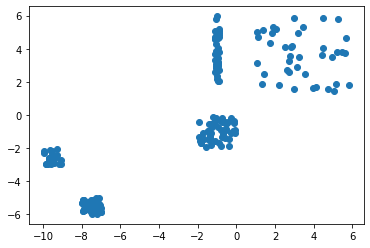

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = -2 * np.random.rand(200, 2)

data1 = 1 + 5 * np.random.rand(40, 2)
data2 = -6 + np.random.rand(50, 2)
data2[:, 0] = data2[:, 0] - 2

data3 = 0.5 + np.random.rand(40, 2)
data3[:, 0] = (data3[:, 0] - 5)/4
data3[:, 1] = data3[:, 1] * 4

data4 = np.random.rand(20, 2)
data4[:, 0] = data4[:, 0] -10
data4[:, 1] = data4[:, 1] -3

data[50:90, :] = data1
data[90:110, :] = data4
data[110:150, :] = data3
data[150:200, :] = data2
plt.scatter(data[ : , 0], data[ :, 1])

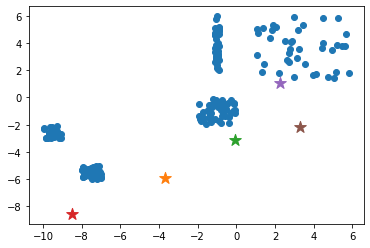

In [ ]:
k = 5
np.random.seed(3)
centroids = np.random.uniform(4, -10, (k, 2))


# Da pogledamo rezultat
plt.scatter(data[ : , 0], data[ :, 1])
for c in centroids:
  plt.scatter(*c, marker='*', s=150)

In [ ]:
import math
from functools import reduce
def racunaj_rastojanje(o,c):
    return math.sqrt((o[0] - c[0])**2 + (o[1] - c[1])**2)

def min(izlaz, ulaz):
    return ulaz if ulaz[1] < izlaz[1] else izlaz


def rastojanje(izlaz, ulaz):
    return izlaz + [(ulaz , racunaj_rastojanje(izlaz[0], ulaz))]


def get_nearest_centroid_list(o , c):
    return o , reduce(min, reduce(rastojanje, c , [o])[1:] , [0, float('inf')]) 



# ovo x se racuna za svaki kruzic iz date pomocu map
# reduce(min, reduce(rastojanje, c , [c]) , [0, float('inf')]) 
#

x = reduce(min, reduce(rastojanje, [[1,1],[1,2],[1,3],[1,4],[1,5]] , [[3,4]])[1:] , [0, float('inf')])
print(x)
print("\n\n")

#print(reduce(rastojanje, [[1,1],[1,2],[1,3],[1,4],[1,5]] , [[3,4]])[1:])
#print([reduce(min, [(ulaz , racunaj_rastojanje(izlaz[0], ulaz))], [float('inf'), float('inf')])])


def dodaj_brojac(array):
    return array[0],array[1], 1

def key_add(array, value):
    global brojac_ponavljanja
    if array and array[-1][0][0] == value[0][0] and array[-1][0][1] == value[0][1]:
        array[-1] = array[-1][0], array[-1][1] + (value[1]), array[-1][2] + 1
    else:
        array.append(value)
    return array

def podeli(array):
    return array[0], array[1]/array[2]


def novi_centroidi(centroids, resenje_reduce):
    brojac = 0
    while brojac < len(centroids):
        for x, y in resenje_reduce:
            if centroids[brojac][0] == x[0] and centroids[brojac][1] == x[1]:
                centroids[brojac] = y
                break
        brojac += 1

    return centroids



([1, 4], 2.0)





In [ ]:
from itertools import starmap
import numpy

#   resenje lista elemenata oblika:
#   (kruzic , (najbliza_zvezda, rastojanje_kruzic_najbliza_zvezda))
#   (o , (* , d))
#
#   sledece na zadatku je da pretrazimo ovu listu, izvucemo zvezde i njihove kruzice
#   potom treba da se izracuna novi i promeni stari polozaj zvezdi
#   opciono: da se proveri da li se zvezda pomerila (case za END)
#   ponovo da se racuna resenje i ponovo da se racuna novi polozaj itd itd


for x in range(20):

    print("CENTROIDS: {}".format(centroids))
    starting_data = list()
    for o in data:
        starting_data.append((o, centroids))

    resenje = starmap(get_nearest_centroid_list, starting_data)

    resenje_bez_d = map(dodaj_brojac, sorted(list(starmap(lambda x, y : (y[0], x) , resenje)), key=lambda x: (x[0][0],x[0][1])))

    centroids = sorted(centroids, key = lambda x : (x[0],x[1]))

    resenje_reduce = map(podeli, reduce(key_add, resenje_bez_d, []))


    centroids = sorted(novi_centroidi(centroids , list(resenje_reduce)), key = lambda x : (x[0],x[1]))
    




CENTROIDS: [[-3.71117064 -5.91406952]
 [-0.07266634 -3.15158647]
 [-8.50125736 -8.54810325]
 [ 2.24180565  1.09859971]
 [ 3.27945915 -2.17133781]]
CENTROIDS: [array([-8.12126046, -4.64184262]), array([-7.13336447, -5.19410049]), array([-1.00095417, -1.01418777]), array([1.14575639, 3.66285827]), array([ 3.27945915, -2.17133781])]
CENTROIDS: [array([-9.16534317, -3.2189294 ]), array([-7.39204158, -5.54541155]), array([-0.98700953, -0.99790819]), array([1.00740538, 3.79394428]), array([5.17992501, 1.58600654])]
CENTROIDS: [array([-9.53374981, -2.61801201]), array([-7.45747512, -5.50660065]), array([-0.98700953, -0.99790819]), array([0.26173542, 3.90451953]), array([4.77243265, 2.93765494])]
CENTROIDS: [array([-9.53374981, -2.61801201]), array([-7.45747512, -5.50660065]), array([-0.98700953, -0.99790819]), array([-0.37362354,  3.94506182]), array([4.01922907, 3.27673266])]
CENTROIDS: [array([-9.53374981, -2.61801201]), array([-7.45747512, -5.50660065]), array([-0.98700953, -0.99790819]), 

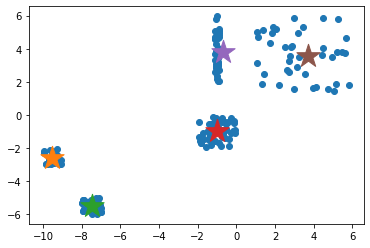

In [ ]:

plt.scatter(data[ : , 0], data[ :, 1])
for c in centroids:
  plt.scatter(*c, marker='*', s=600)
